# IGVF Annual Meeting Poster

## IGVF portal data exploration

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 20
sns.set_context('poster')
%matplotlib inline

In [2]:
A549_Dex = pd.read_csv('/hpc/home/rv103/igvf/SHARED/IGVF_variant_preds/A549.Dex.filtered_0_1.spdi.bed.gz', sep='\t', compression='gzip', names=['chr','start','end','logFC','SPDI'])
A549_DMSO = pd.read_csv('/hpc/home/rv103/igvf/SHARED/IGVF_variant_preds/A549.DMSO.filtered_0_1.spdi.bed.gz', sep='\t', compression='gzip', names=['chr','start','end','logFC','SPDI'])
K562 = pd.read_csv('/hpc/home/rv103/igvf/SHARED/IGVF_variant_preds/K562.filtered_0_1.spdi.bed.gz', sep='\t', compression='gzip', names=['chr','start','end','logFC','SPDI'])
K562_encode = pd.read_csv('/hpc/home/rv103/igvf/SHARED/IGVF_variant_preds/K562.encode_ccres_filtered.bed.gz', sep='\t', compression='gzip', names=['chr','start','end','logFC','SPDI'])

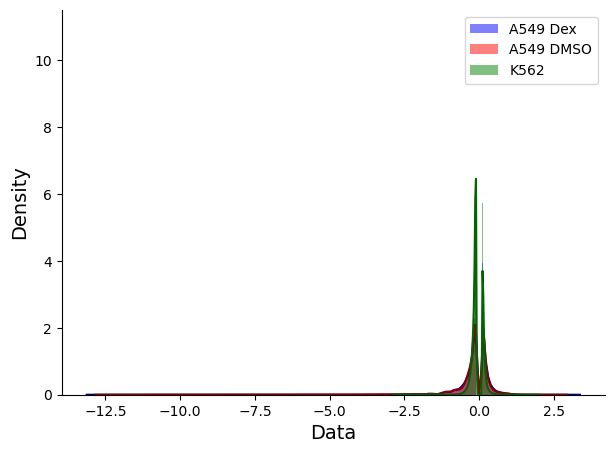

In [7]:
plt.figure(figsize=(7,5))
plt.hist(A549_Dex['logFC'], density=True, bins=1000, alpha=0.5,  color='blue', label="A549 Dex")
plt.hist(A549_DMSO['logFC'], density=True, bins=1000, alpha=0.5,  color='red', label="A549 DMSO")
plt.hist(K562['logFC'], density=True, bins=1000, alpha=0.5,  color='green', label="K562")
plt.hist(K562_encode['logFC'], density=True, bins=1000, alpha=0.5,  color='yellow', label="K562")

sns.kdeplot(A549_Dex['logFC'], color='darkblue')
sns.kdeplot(A549_DMSO['logFC'], color='darkred')
sns.kdeplot(K562['logFC'], color='darkgreen')
sns.kdeplot(K562_encode['logFC'], color='darkgreen')

plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
# plt.xlim(-2.5,2.5)
sns.despine()
plt.show()

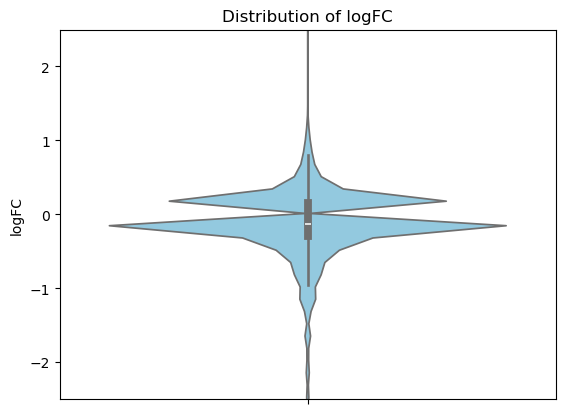

In [4]:
sns.violinplot(y='logFC', data=A549_Dex, inner='box', color='skyblue')
plt.title('Distribution of logFC')
plt.ylabel('logFC')
plt.xlabel('')
plt.ylim(-2.5,2.5)
plt.show()

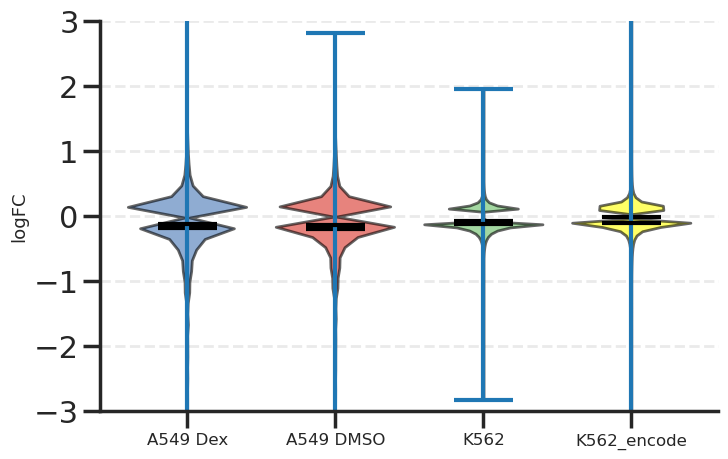

In [7]:
data = [A549_Dex['logFC'], A549_DMSO['logFC'], K562['logFC'], K562_encode['logFC']]
labels = ['A549 Dex', 'A549 DMSO', 'K562', 'K562_encode']

fig, ax = plt.subplots(figsize=(8,5))

parts = ax.violinplot(
    data,
    positions=np.arange(1, len(data)+1),
    showmeans=True,
    showmedians=True,
    widths=0.8
)

colors = ['#4575b4', '#d73027', '#66bd63', 'yellow']
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)


parts['cmeans'].set_color('black')
parts['cmedians'].set_color('black')

ax.set_xticks(np.arange(1, len(labels)+1))
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('logFC', fontsize=13)
# ax.set_title('Distribution of logFC Across Cell Lines', fontsize=14, weight='bold')

ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.ylim(-3,3)
sns.despine()
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def step_hists(dfs, labels, column='logFC', bins=80, range_=None):
    plt.figure(figsize=(7,4))
    # Choose common range to make comparisons fair
    if range_ is None:
        vals = np.concatenate([df[column].dropna().values for df in dfs])
        lo, hi = np.percentile(vals, [0.5, 99.5])  # trim extremes for readability
        range_ = (lo, hi)
    for df, lab in zip(dfs, labels):
        plt.hist(df[column].dropna(), bins=bins, range=range_,
                 histtype='step', density=True, label=lab)
    plt.xlabel('logFC'); plt.ylabel('Density'); plt.title('Step histograms (shared bins)')
    plt.legend(); plt.tight_layout(); plt.show()




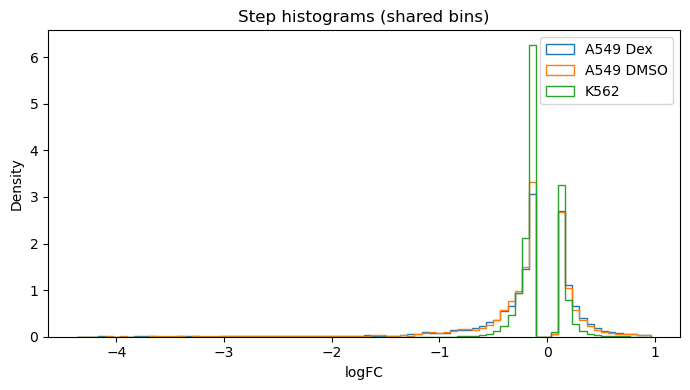

In [15]:
step_hists([A549_Dex, A549_DMSO, K562], ['A549 Dex','A549 DMSO','K562'])

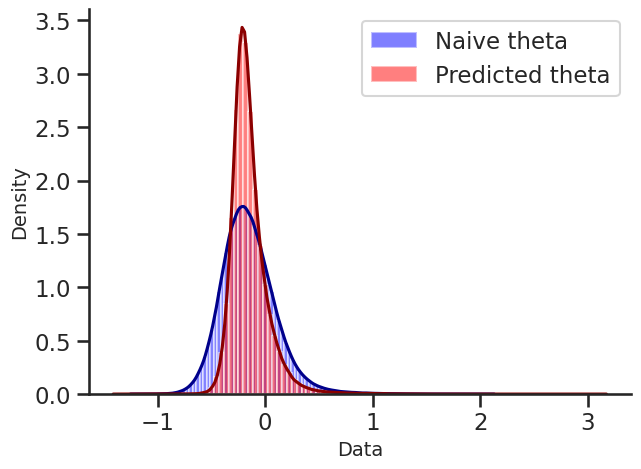

In [39]:
k562_mse = pd.read_csv('/hpc/home/rv103/igvf/revathy/models/K562/mse_loss/K562-2.txt', sep='\t', index_col=None)

plt.figure(figsize=(7,5))
plt.hist(k562_mse['true'], density=True, bins=100, alpha=0.5, color='blue', label="Naive theta")
plt.hist(k562_mse['predicted'], density=True, bins=100, alpha=0.5, color='red', label="Predicted theta")

sns.kdeplot(k562_mse['true'], color='darkblue')
sns.kdeplot(k562_mse['predicted'], color='darkred')

plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
# plt.xlim(-2.5,2.5)
sns.despine()
plt.show()

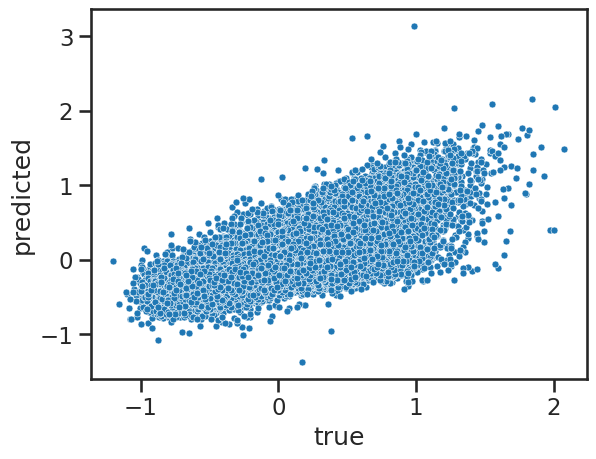

In [44]:
sns.scatterplot(x='true',y='predicted', data=k562_mse, s=25)
plt.show()


## Model Training - validation loss plots

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 20
sns.set_context('poster')
%matplotlib inline

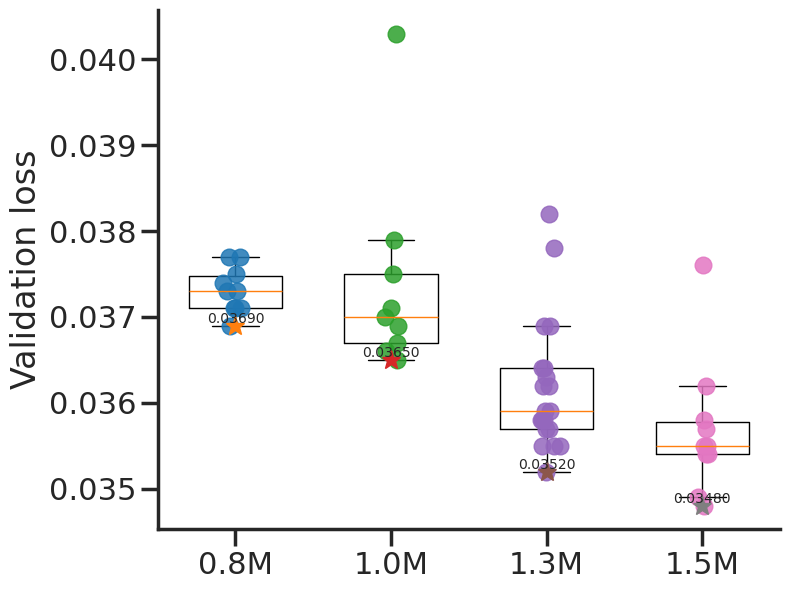


Best run per model:
-------------------
  0.8M  ->  best_run=10, best_val=0.036900  (n_runs=10)
  1.0M  ->  best_run=10, best_val=0.036500  (n_runs=9)
  1.3M  ->  best_run=5, best_val=0.035200  (n_runs=20)
  1.5M  ->  best_run=9, best_val=0.034800  (n_runs=10)


In [10]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# -----------------------------
# 1) Settings
# -----------------------------
log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
models_to_show = ["K562_800k", "K562_1M", "K562_1.3M", "K562_1.5M"]
rng = np.random.default_rng(42)  # for reproducible jitter

# Optional label cleanup for x-axis
pretty_labels = {
    "K562_800k":  "0.8M",
    "K562_1M":    "1.0M",
    "K562_1.3M":  "1.3M",
    "K562_1.5M":  "1.5M",
}

# -----------------------------
# 2) Parse logs -> per-run best loss
# -----------------------------
pattern_mse_line = re.compile(r"Min validation loss: \s*([0-9eE\+\.-]+)")
run_losses = defaultdict(list)  # model -> [best_loss_per_run]

for model_name in models_to_show:
    pattern = os.path.join(log_dir, f"{model_name}_*.out")
    files = glob.glob(pattern)

    for file in files:
        # Extract run number, if you want to report it later
        base = os.path.splitext(os.path.basename(file))[0]
        m = re.match(fr"{re.escape(model_name)}_(\d+)", base)
        run_num = int(m.group(1)) if m else None

        # Scan file for all "K562 mse=" values, take the minimum as "best"
        best = None
        with open(file, "r") as fh:
            for line in fh:
                mm = pattern_mse_line.search(line)
                if mm:
                    val = float(mm.group(1))
                    best = val if best is None else min(best, val)

        if best is not None:
            run_losses[model_name].append((run_num, best))

# Guard if no data
if not any(run_losses.values()):
    raise RuntimeError("No matching logs or no 'K562 mse=' lines found.")

# -----------------------------
# 3) Prepare data for plotting
# -----------------------------
models_order = [m for m in models_to_show if m in run_losses and run_losses[m]]
data = [ [b for (_, b) in sorted(run_losses[m], key=lambda x: (x[0] is None, x[0]))]
         for m in models_order ]
xticklabels = [pretty_labels.get(m, m) for m in models_order]

# -----------------------------
# 4) Poster-friendly figure: Boxplot + jitter + star on best run
# -----------------------------
plt.rcParams.update({
    "font.size": 10,
    # "axes.labelsize": 10,
#     "axes.titlesize": 16,
#     "xtick.labelsize": 12,
#     "ytick.labelsize": 12
})

fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(data, showfliers=False, widths=0.6)

# Overlay jittered points (each run)
for i, vals in enumerate(data, start=1):
    x = np.full(len(vals), i, dtype=float)
    x += rng.normal(0, 0.04, size=len(vals))  # jitter
    ax.plot(x, vals, marker='o', linestyle='None', alpha=0.85)

    # Mark the best (minimum) run with a star
    best_val = float(np.min(vals))
    ax.plot(i, best_val, marker='*', markersize=14)
    # Optional best value annotation
    ax.text(i, best_val, f"{best_val:.5f}", ha='center', va='bottom')

ax.set_xticks(range(1, len(models_order) + 1))
ax.set_xticklabels(xticklabels)
ax.set_ylabel("Validation loss")
# ax.set_title("Independent runs reduce risk of local minima")
fig.tight_layout()
sns.despine()
plt.show()

# -----------------------------
# 5) Print a small summary table (best run per model)
# -----------------------------
print("\nBest run per model:")
print("-------------------")
for m in models_order:
    runs = sorted(run_losses[m], key=lambda x: x[1])  # sort by loss
    best_run, best_val = runs[0]
    label = pretty_labels.get(m, m)
    print(f"{label:>6s}  ->  best_run={best_run}, best_val={best_val:.6f}  (n_runs={len(runs)})")

# -----------------------------
# (Optional) If you also want a simple scatter-only summary:
# -----------------------------
# fig2, ax2 = plt.subplots(figsize=(8.8, 3.5))
# for i, vals in enumerate(data, start=1):
#     x = np.full(len(vals), i, dtype=float)
#     x += rng.normal(0, 0.04, size=len(vals))
#     ax2.plot(x, vals, marker='o', linestyle='None', alpha=0.9)
#     ax2.plot(i, np.min(vals), marker='*', markersize=14)
# ax2.set_xticks(range(1, len(models_order) + 1))
# ax2.set_xticklabels(xticklabels)
# ax2.set_ylabel("Final validation loss (MSE)")
# ax2.set_title("Per-run variability (select lowest-loss model)")
# fig2.tight_layout(); plt.show()
